In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import tensorflow as tf

In [4]:
print(tf.__version__)

2.17.0


In [5]:
import tensorflow_hub as hub

In [6]:
print("yess" if tf.config.list_physical_devices('GPU') else "not available")

not available


In [7]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [8]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [9]:
df=pd.read_csv("sample_submission.csv")
df

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10352,ffeda8623d4eee33c6d1156a2ecbfcf8,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
10353,fff1ec9e6e413275984966f745a313b0,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
10354,fff74b59b758bbbf13a5793182a9bbe4,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
10355,fff7d50d848e8014ac1e9172dc6762a3,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [13]:
labels=pd.read_csv("labels.csv")

<Axes: xlabel='breed'>

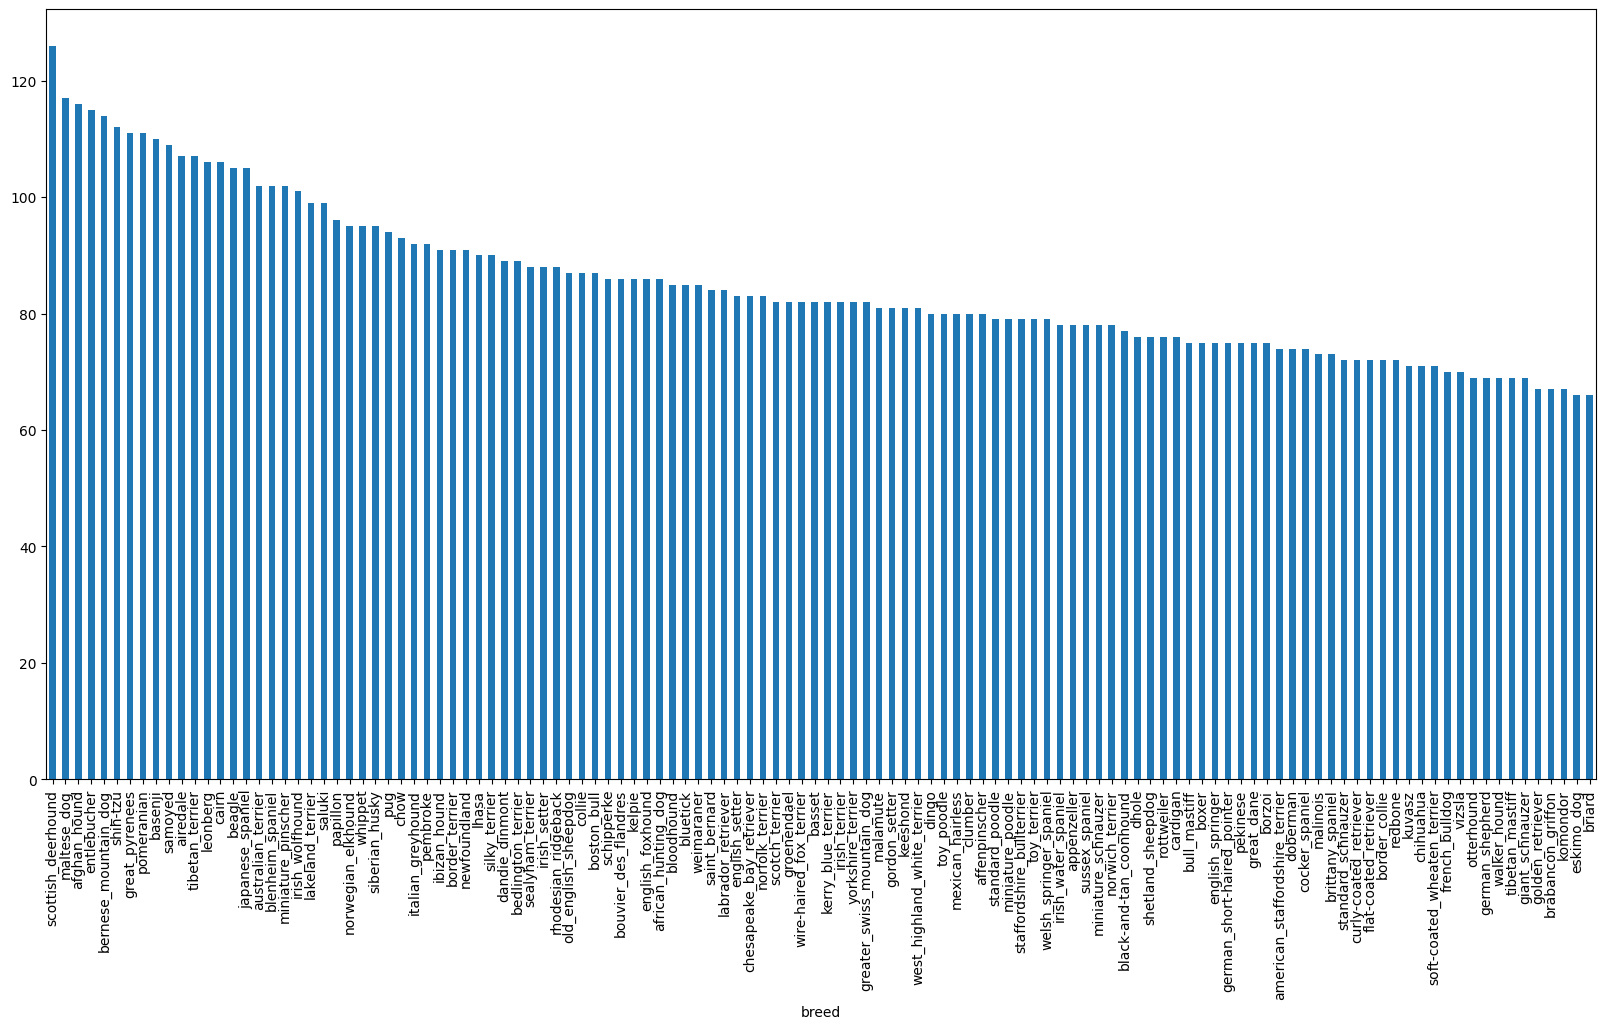

In [17]:
labels["breed"].value_counts().plot(figsize=(20,10),kind="bar")

In [18]:
from IPython.display import Image

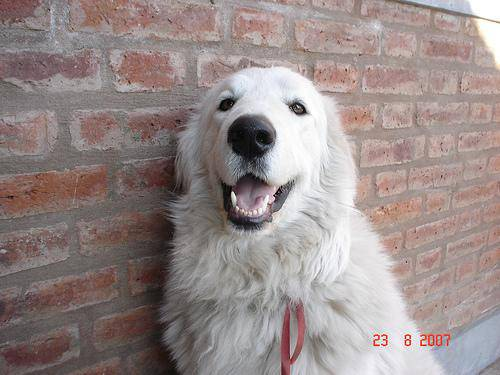

In [24]:
Image("train/0a0c223352985ec154fd604d7ddceabd.jpg")

In [26]:
filenames=[f"tarin/{i}.jpg" for i in labels["id"]]

In [27]:
filenames

['tarin/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'tarin/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'tarin/001cdf01b096e06d78e9e5112d419397.jpg',
 'tarin/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'tarin/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'tarin/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'tarin/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'tarin/002a283a315af96eaea0e28e7163b21b.jpg',
 'tarin/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'tarin/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'tarin/004396df1acd0f1247b740ca2b14616e.jpg',
 'tarin/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 'tarin/00693b8bc2470375cc744a6391d397ec.jpg',
 'tarin/006cc3ddb9dc1bd827479569fcdc52dc.jpg',
 'tarin/0075dc49dab4024d12fafe67074d8a81.jpg',
 'tarin/00792e341f3c6eb33663e415d0715370.jpg',
 'tarin/007b5a16db9d9ff9d7ad39982703e429.jpg',
 'tarin/007b8a07882822475a4ce6581e70b1f8.jpg',
 'tarin/007ff9a78eba2aebb558afea3a51c469.jpg',
 'tarin/008887054b18ba3c7601792b6a453cc3.jpg',
 'tarin/008b1271ed1addaccf93783b39deab45.jpg',
 'tarin/008ba

In [30]:
names=np.array(labels["breed"]).astype(str)

In [31]:
names

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype='<U30')